In [1]:
import pandas as pd;
import matplotlib.pyplot as plt

In [2]:
sheets = ["rulespergoal8.csv" ,
          "rulespergoal5.csv" , 
          "rulespergoal3.csv" , 
          "goals100beliefs1000.csv" , 
          "goals50beliefs1000.csv", 
          "goals100beliefs500.csv",
         "dynamics01.csv" , 
          "dynamics02.csv",
         "inertiaDual.csv",
         "dualTest.csv"];

memoryStrategies = [ "DEFAULT" , "STORING_RETRIEVING"  , "FORGETTING"];

engines = ["SOAREngine" , "BDIEngine" , "BBGPEngine"];

SOAR = 0 ; BDI = 1 ; BBGP = 2;

relevanceModels = ["DefaultRelevanceModel" , 
                   "SOARIntegratedRelevanceModel",
                   "BDIIntegratedRelevanceModel" ,
                  "BBGPIntegratedRelevanceModel" ];

alternativeModels = ["SOARAlternativeRelevanceModel",
                   "BDIAlternativeRelevanceModel" ,
                  "BBGPAlternativeRelevanceModel" ];

efficiencyProperties = ["eficienciaMemoria" , "eficienciaCpu"];

In [3]:
def select(memoryStrategy , engine, relevanceModel):
    
    return data.loc[(data['tipoDeMemoria'].str.contains(memoryStrategy)) 
                   & (data['modeloDeRelevancia'].str.contains(relevanceModel))
                     & (data['tipoDeRaciocinio'].str.contains(engine))]

In [4]:
def describe(memoryStrategy , engine, relevanceModel , efficiencyProperty):
    return select(memoryStrategy , engine , relevanceModel)[efficiencyProperty].describe()[['mean' , 'std' , 'min' , '25%', '50%', '75%','max']];

def describeMem(memoryStrategy , engine, relevanceModel):
    return describe(memoryStrategy , engine, relevanceModel , efficiencyProperties[0]);

def describeCpu(memoryStrategy , engine, relevanceModel):
    return describe(memoryStrategy , engine, relevanceModel , efficiencyProperties[1]);


In [5]:
def describeMemPerEngine(engineIndex):
    default = describeMem(memoryStrategies[0] , engines[engineIndex] , relevanceModels[0]);
    defaultIntegrated = describeMem(memoryStrategies[0] , engines[engineIndex] , relevanceModels[engineIndex+1]);
    defaultAlternative = describeMem(memoryStrategies[0] , engines[engineIndex] , alternativeModels[engineIndex]);
    storing = describeMem(memoryStrategies[1] , engines[engineIndex] , relevanceModels[0]);
    storingIntegrated = describeMem(memoryStrategies[1] , engines[engineIndex] , relevanceModels[engineIndex+1]);
    storingAlternative = describeMem(memoryStrategies[1] , engines[engineIndex] , alternativeModels[engineIndex]);
    oblivion = describeMem(memoryStrategies[2] , engines[engineIndex] , relevanceModels[0]);
    oblivionIntegrated = describeMem(memoryStrategies[2] , engines[engineIndex] , relevanceModels[engineIndex+1]);
    oblivionAlternative = describeMem(memoryStrategies[2] , engines[engineIndex] , alternativeModels[engineIndex]);
    return createDataFrame(default, defaultIntegrated, defaultAlternative,
                           storing, storingIntegrated, storingAlternative,
                           oblivion, oblivionIntegrated, oblivionAlternative);
    
def describeCpuPerEngine(engineIndex):
    default = describeCpu(memoryStrategies[0] , engines[engineIndex] , relevanceModels[0]);
    defaultIntegrated = describeCpu(memoryStrategies[0] , engines[engineIndex] , relevanceModels[engineIndex+1]);
    defaultAlternative = describeCpu(memoryStrategies[0] , engines[engineIndex] , alternativeModels[engineIndex]);
    storing = describeCpu(memoryStrategies[1] , engines[engineIndex] , relevanceModels[0]);
    storingIntegrated = describeCpu(memoryStrategies[1] , engines[engineIndex] , relevanceModels[engineIndex+1]);
    storingAlternative = describeCpu(memoryStrategies[1] , engines[engineIndex] , alternativeModels[engineIndex]);
    oblivion = describeCpu(memoryStrategies[2] , engines[engineIndex] , relevanceModels[0]);
    oblivionIntegrated = describeCpu(memoryStrategies[2] , engines[engineIndex] , relevanceModels[engineIndex+1]);
    oblivionAlternative = describeCpu(memoryStrategies[2] , engines[engineIndex] , alternativeModels[engineIndex]);
    return createDataFrame(default, defaultIntegrated, defaultAlternative,
                           storing, storingIntegrated, storingAlternative,
                           oblivion, oblivionIntegrated, oblivionAlternative);   

In [6]:
def createDataFrame(default, defaultIntegrated, defaultAlternative,
                           storing, storingIntegrated, storingAlternative,
                           oblivion, oblivionIntegrated, oblivionAlternative):
    return pd.DataFrame(list(zip(default, defaultIntegrated, defaultAlternative,
                           storing, storingIntegrated, storingAlternative,
                           oblivion, oblivionIntegrated, oblivionAlternative)), 
                             columns =['Default', 'Default-Integrated', 'Default-Inverted', 
                                       'Storing', 'Storing-Integrated', 'Storing-Inverted',
                                       'Oblivion', 'Oblivion-Integrated', 'Oblivion-Inverted'] , 
                             index = ['média' , 'desvio' , 'min' , '25%', '50%', '75%','máx']);
    

In [7]:
def plotGraphMem():
    soar = describeMemPerEngine(SOAR);
    bdi = describeMemPerEngine(BDI);
    bbgp = describeMemPerEngine(BBGP);
    fig, axes = plt.subplots(1, 3 , sharey=True)
    plt.rcParams["figure.figsize"] = (20, 15)
    plt.tight_layout()
    soar.plot.box(ax=axes[0] , title="SOAR");
    bdi.plot.box(ax=axes[1] , title="BDI");
    bbgp.plot.box(ax=axes[2] , title="BBGP");
    
    #plt.savefig('mem.svg')

In [8]:
def plotGraphCpu():
    soar = describeCpuPerEngine(SOAR);
    bdi = describeCpuPerEngine(BDI);
    bbgp = describeCpuPerEngine(BBGP);
    fig, axes = plt.subplots(1, 3 , sharey= True)
    plt.rcParams["figure.figsize"] = (20, 10)
    plt.tight_layout()
    soar.plot.box(ax=axes[0] ,title="SOAR");
    bdi.plot.box(ax=axes[1] , title="BDI");
    bbgp.plot.box(ax=axes[2] , title="BBGP");
    #plt.savefig('cpu.svg')

In [13]:
data = pd.read_csv("alternative.csv" , sep =";", decimal =",")##100x1000

In [14]:
data

,modeloDeRelevancia,tipoDeMemoria,tipoDeRaciocinio,comparacoes,memoria,movimentacoes,utilidade,eficienciaCpu,eficienciaMemoria
0,BBGPIntegratedRelevanceModel,STORING_RETRIEVING,BBGPEngine,28144.371,15.62775,562.90375,13.084788,0.837279,0.038743
1,BDIIntegratedRelevanceModel,FORGETTING,BDIEngine,6251.331,1.36750,579.01624,1.982205,1.449510,0.016461
2,BBGPIntegratedRelevanceModel,FORGETTING,BBGPEngine,4238.471,1.40450,722.39480,1.990338,1.417115,0.017364
3,SOARIntegratedRelevanceModel,DEFAULT,SOAREngine,238901.620,226.15150,0.00000,27.857500,0.123181,0.011661
4,DefaultRelevanceModel,DEFAULT,BBGPEngine,161252.670,226.15150,0.00000,27.857500,0.123181,0.017276
...,...,...,...,...,...,...,...,...,...
1723,BDIAlternativeRelevanceModel,STORING_RETRIEVING,BDIEngine,40405.360,4.26725,1569.08200,0.000000,0.000000,0.000000
1724,BBGPAlternativeRelevanceModel,STORING_RETRIEVING,BBGPEngine,39793.207,13.29400,854.73800,5.783141,0.435019,0.011963
1725,BBGPAlternativeRelevanceModel,FORGETTING,BBGPEngine,4641.195,1.59500,740.77124,0.000000,0.000000,0.000000
1726,BDIAlternativeRelevanceModel,STORING_RETRIEVING,BDIEngine,292107.800,58.20925,70524.68000,14.065955,0.241645,0.001410


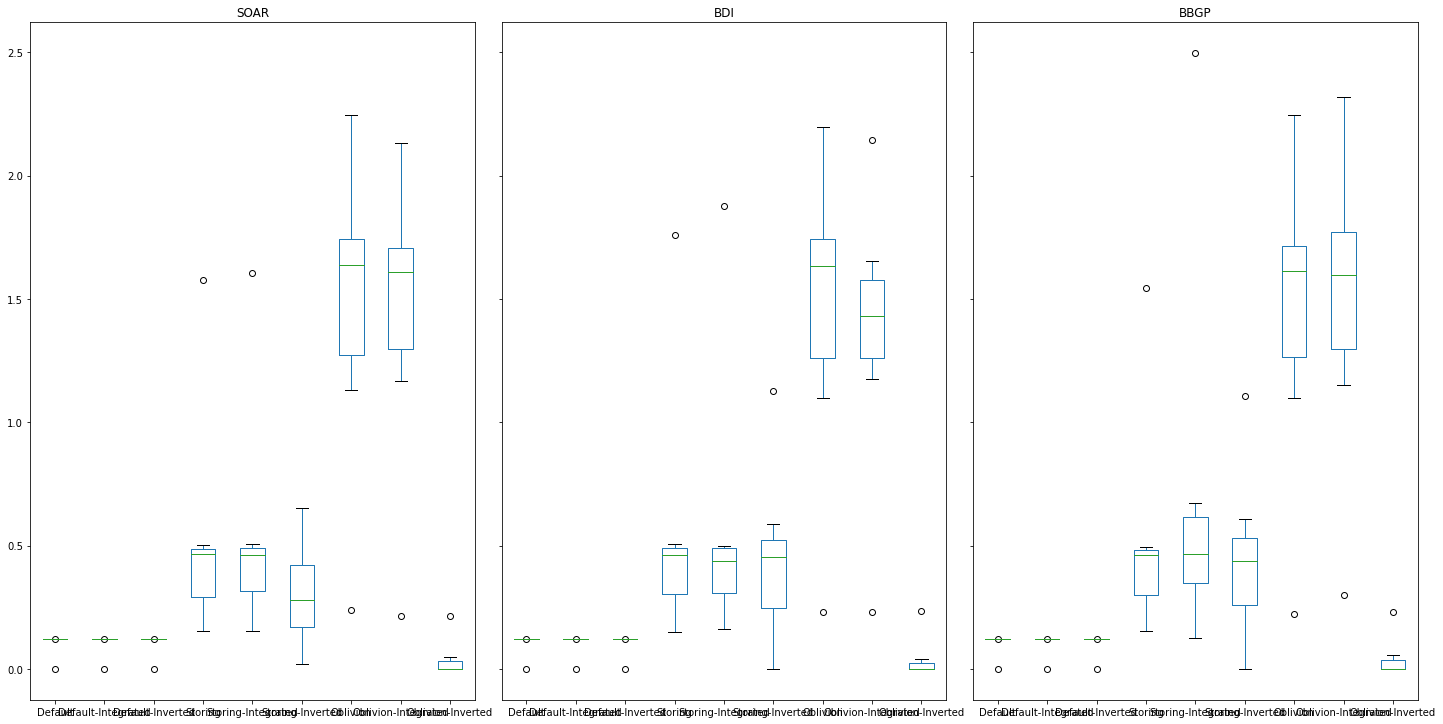

In [16]:
plotGraphCpu()

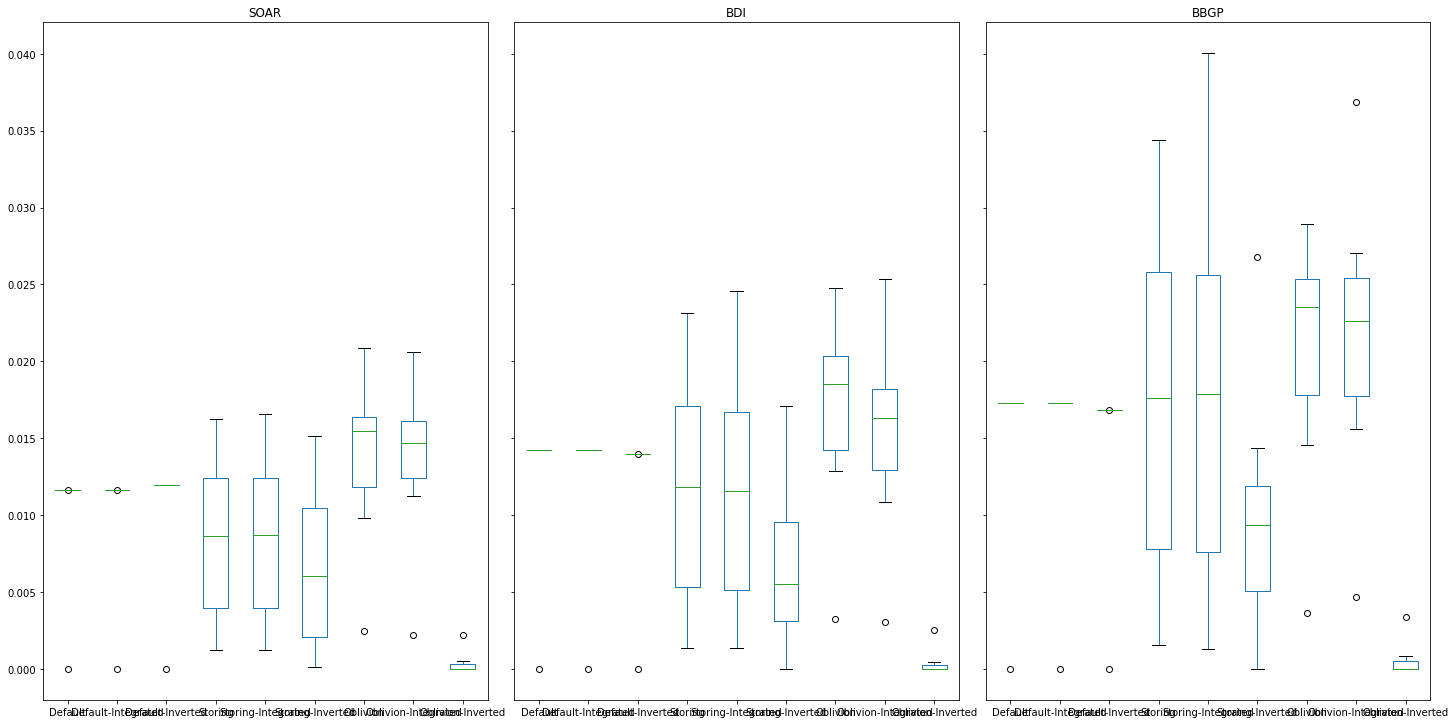

In [17]:
plotGraphMem()